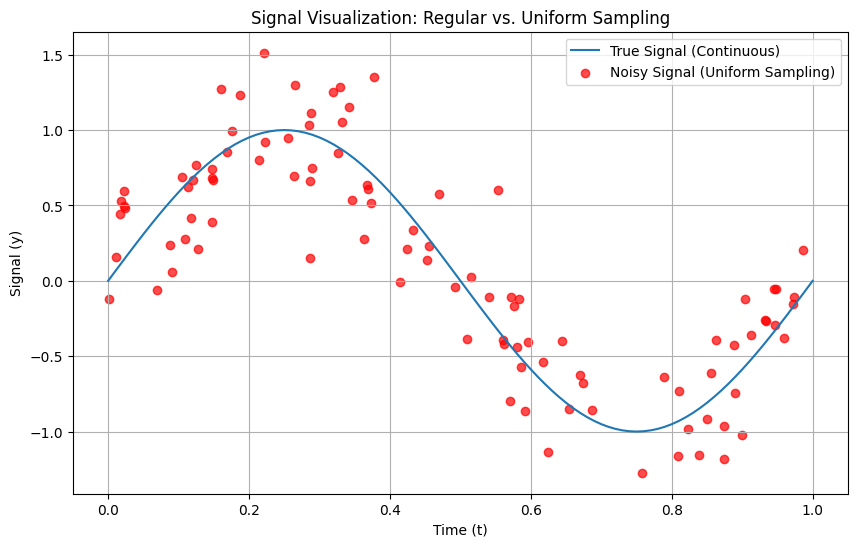

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate data
t_regular = np.arange(0, 1.01, 0.01)
y_regular = np.sin(2 * np.pi * t_regular)

t_uniform = np.sort(np.random.uniform(0, 1, 100))
noise_sigma = 0.3
y_uniform = np.sin(2 * np.pi * t_uniform) + np.random.normal(0, noise_sigma, len(t_uniform))

# Plot data
plt.figure(figsize=(10, 6))
plt.plot(t_regular, y_regular, label="True Signal (Continuous)")
plt.scatter(t_uniform, y_uniform, color='red', label="Noisy Signal (Uniform Sampling)", alpha=0.7)
plt.title("Signal Visualization: Regular vs. Uniform Sampling")
plt.xlabel("Time (t)")
plt.ylabel("Signal (y)")
plt.legend()
plt.grid()
plt.show()

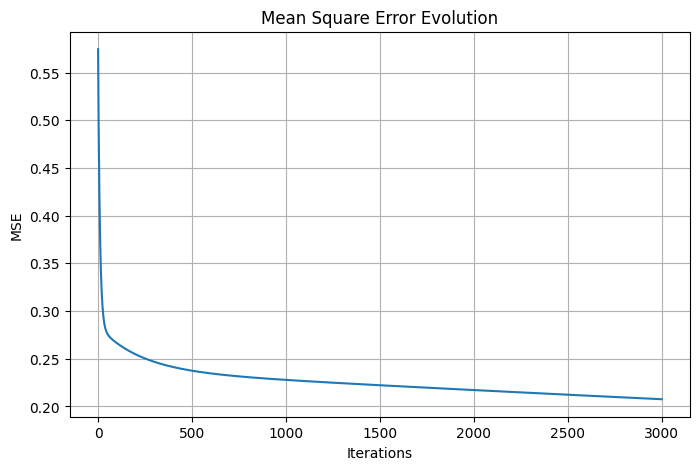

In [2]:
# Polynomial Model: y_hat = w0 + w1*t + w2*t^2 + ...
def polynomial_model(t, weights):
    return sum(w * (t ** i) for i, w in enumerate(weights))

# Gradient Descent Implementation
def gradient_descent(X, Y, M, eta, iterations):
    weights = np.zeros(M + 1)  # Initialize weights
    n = len(X)
    mse_history = []

    for _ in range(iterations):
        y_hat = polynomial_model(X, weights)
        error = y_hat - Y
        gradients = [np.mean(error * (X ** i)) for i in range(M + 1)]
        weights -= eta * np.array(gradients)
        mse = np.mean(error ** 2)
        mse_history.append(mse)
    
    return weights, mse_history

# Training data
np.random.seed(0)
L = 100
X_train = np.sort(np.random.uniform(0, 1, L))
Y_train = np.sin(2 * np.pi * X_train) + np.random.normal(0, 0.2, L)

# Run gradient descent
M, eta, iterations = 3, 0.3, 3000
weights, mse_history = gradient_descent(X_train, Y_train, M, eta, iterations)

# Plot MSE evolution
plt.figure(figsize=(8, 5))
plt.plot(mse_history)
plt.title("Mean Square Error Evolution")
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.grid()
plt.show()

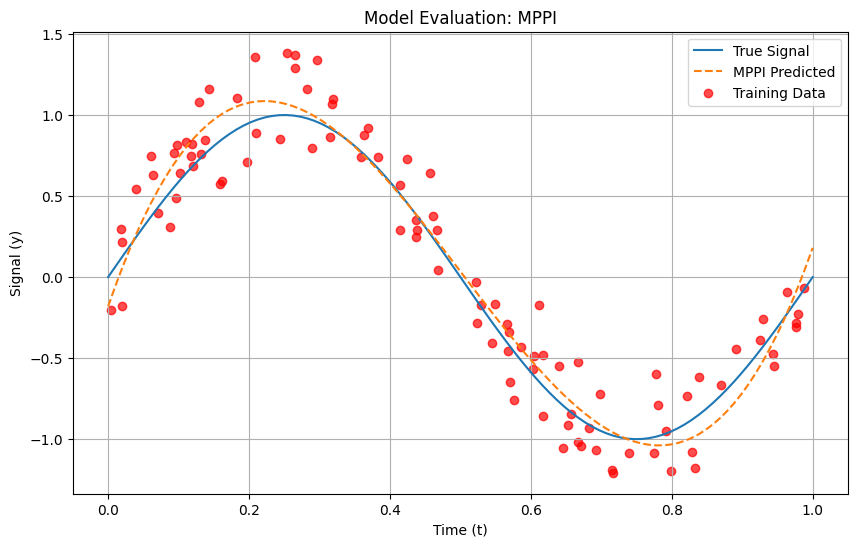

In [3]:
# Moore-Penrose Pseudo-Inverse Method
def mppi(X, Y, M):
    # Design matrix
    Phi = np.vstack([X ** i for i in range(M + 1)]).T
    # Compute weights using MPPI
    weights = np.linalg.pinv(Phi) @ Y
    return weights

# Compute weights using MPPI
weights_mppi = mppi(X_train, Y_train, M)

# Evaluate model
t_test = np.linspace(0, 1, 100)
y_true = np.sin(2 * np.pi * t_test)
y_pred_mppi = polynomial_model(t_test, weights_mppi)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(t_test, y_true, label="True Signal")
plt.plot(t_test, y_pred_mppi, label="MPPI Predicted", linestyle="--")
plt.scatter(X_train, Y_train, color='red', label="Training Data", alpha=0.7)
plt.title("Model Evaluation: MPPI")
plt.xlabel("Time (t)")
plt.ylabel("Signal (y)")
plt.legend()
plt.grid()
plt.show()


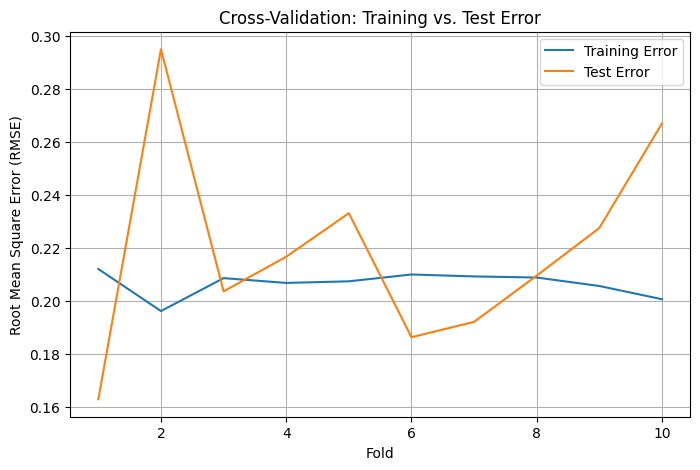

In [4]:
# Cross-Validation
from sklearn.model_selection import KFold

def cross_validation(X, Y, M, k_folds=10):
    kf = KFold(n_splits=k_folds, shuffle=True, random_state=0)
    train_errors, test_errors = [], []
    
    for train_idx, test_idx in kf.split(X):
        X_train, X_test = X[train_idx], X[test_idx]
        Y_train, Y_test = Y[train_idx], Y[test_idx]

        # Train model using MPPI
        weights = mppi(X_train, Y_train, M)
        
        # Compute errors
        train_pred = polynomial_model(X_train, weights)
        test_pred = polynomial_model(X_test, weights)
        train_errors.append(np.sqrt(np.mean((Y_train - train_pred) ** 2)))
        test_errors.append(np.sqrt(np.mean((Y_test - test_pred) ** 2)))

    return train_errors, test_errors

# Perform cross-validation
train_errors, test_errors = cross_validation(X_train, Y_train, M)

# Plot errors
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(train_errors) + 1), train_errors, label="Training Error")
plt.plot(range(1, len(test_errors) + 1), test_errors, label="Test Error")
plt.title("Cross-Validation: Training vs. Test Error")
plt.xlabel("Fold")
plt.ylabel("Root Mean Square Error (RMSE)")
plt.legend()
plt.grid()
plt.show()
